# Comprehensive Face Recognition and Attribute Analysis

This notebook demonstrates how to use modern models for face recognition and facial attribute analysis. We will compare images to determine if they depict the same person or different people, and analyze facial attributes such as age, gender, emotion, and race.

## Sections:
1. Comparing Images of the Same Person
2. Comparing Images of Different People
3. Facial Attribute Analysis


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from deepface import DeepFace

# Load and display images
def load_and_display_images(image_paths, titles):
    images = [Image.open(img_path) for img_path in image_paths]
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Example image paths
image_path1 = 'data/images/msch.jpeg'
image_path2 = 'data/images/msch2.jpeg'
image_path3 = 'data/images/mk.jpeg'
image_path4 = 'data/images/koos.png'
image_path5 = 'data/images/mathijs.png'


## Comparing Images of the Same Person

In this section, we will compare images of the same person to verify their identity.


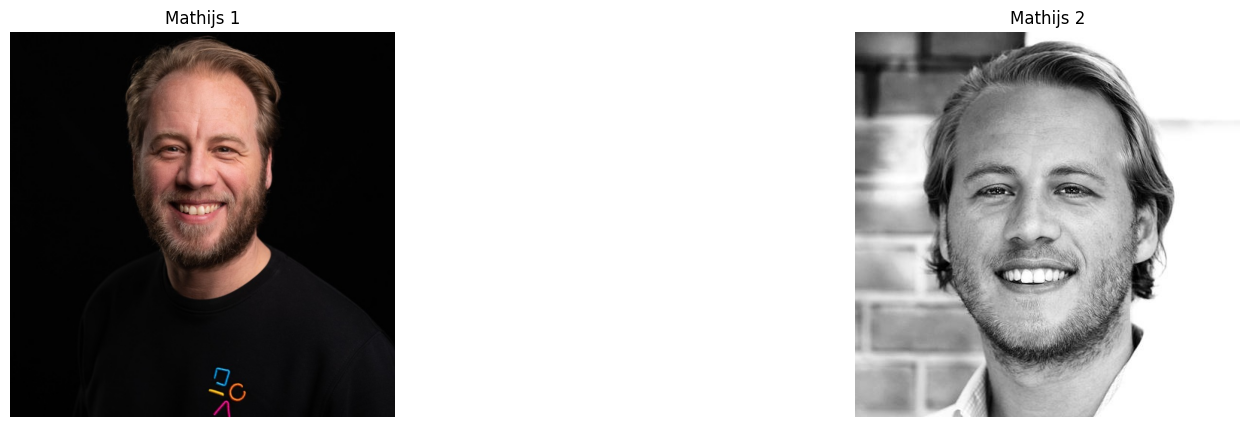


### Face Recognition Results
**Are the images of the same person?**: Yes  
**Similarity (cosine distance)**: 0.28

**Explanation**:  
The similarity score (cosine distance) measures how alike the two faces are. A lower score indicates higher similarity.  
In this case, the score is 0.28. If it is below the threshold of 0.40, we consider the faces to be of the same person.  
**The result is**: Yes, the faces are of the same person.
    

In [2]:
# Load and display images of the same person
load_and_display_images([image_path1, image_path2], ['Mathijs 1', 'Mathijs 2'])

# Compare the faces using DeepFace
def compare_faces(img1_path, img2_path, model_name='Facenet'):
    result = DeepFace.verify(img1_path, img2_path, model_name=model_name)
    verified = result['verified']
    distance = result['distance']
    threshold = result['threshold']
    
    display(Markdown(f"""
### Face Recognition Results
**Are the images of the same person?**: {'Yes' if verified else 'No'}  
**Similarity (cosine distance)**: {distance:.2f}

**Explanation**:  
The similarity score (cosine distance) measures how alike the two faces are. A lower score indicates higher similarity.  
In this case, the score is {distance:.2f}. If it is below the threshold of {threshold:.2f}, we consider the faces to be of the same person.  
**The result is**: {'Yes, the faces are of the same person.' if verified else 'No, the faces are not of the same person.'}
    """))

compare_faces(image_path1, image_path2)


## Comparing Images of Different People

In this section, we will compare images of different people to verify their identity.


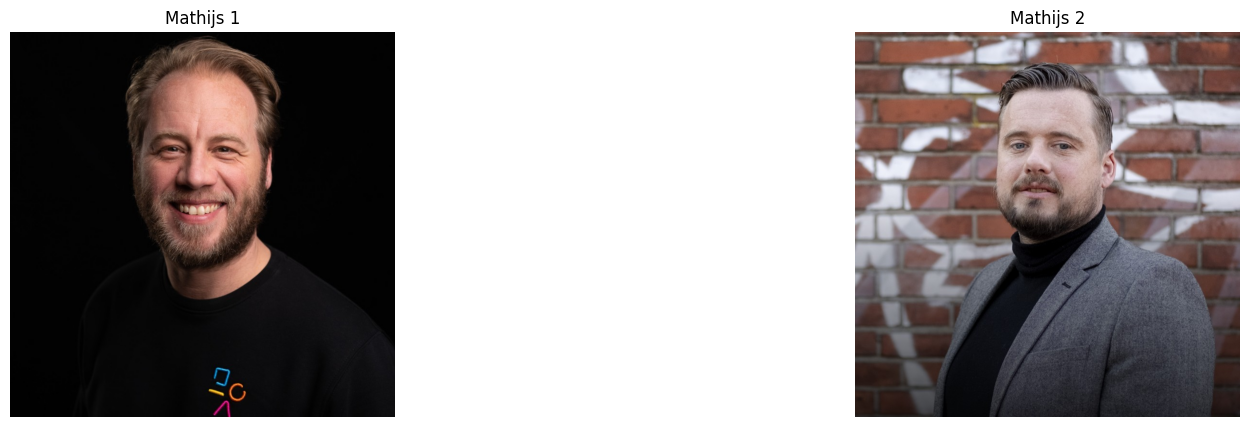


### Face Recognition Results
**Are the images of the same person?**: No  
**Similarity (cosine distance)**: 0.45

**Explanation**:  
The similarity score (cosine distance) measures how alike the two faces are. A lower score indicates higher similarity.  
In this case, the score is 0.45. If it is below the threshold of 0.40, we consider the faces to be of the same person.  
**The result is**: No, the faces are not of the same person.
    

In [3]:
# Load and display images of different people
load_and_display_images([image_path1, image_path3], ['Mathijs 1', 'Mathijs 2'])

# Compare the faces using DeepFace
compare_faces(image_path1, image_path3)


## Facial Attribute Analysis

We will use the `deepface` library to analyze facial attributes such as age, gender, emotion, and race.


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


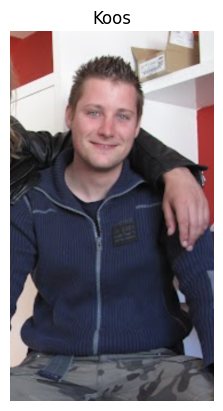


### Koos Attributes:
- **Age**: 30
- **Gender**: {'Woman': 1.920543983578682, 'Man': 98.07944893836975}
- **Race**: white
- **Emotion**: happy
        

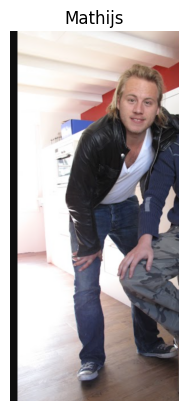


### Mathijs Attributes:
- **Age**: 33
- **Gender**: {'Woman': 21.865780651569366, 'Man': 78.13422083854675}
- **Race**: white
- **Emotion**: sad
        

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Markdown
from deepface import DeepFace

# Analyze facial attributes
def analyze_attributes(image_path):
    try:
        attributes = DeepFace.analyze(image_path, actions=['age', 'gender', 'race', 'emotion'])
        return attributes[0]  # Return the first result from the list
    except ValueError as e:
        display(Markdown(f"**Error analyzing image {image_path}: {str(e)}**"))
        return None

# Display results with images
def display_attributes(attributes, title, image_path):
    if attributes:
        img = Image.open(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)
        ax.axis('off')
        plt.title(title)
        plt.show()

        display(Markdown(f"""
### {title} Attributes:
- **Age**: {attributes['age']}
- **Gender**: {attributes['gender']}
- **Race**: {attributes['dominant_race']}
- **Emotion**: {attributes['dominant_emotion']}
        """))

# Analyze attributes for the images
attributes4 = analyze_attributes(image_path4)
attributes5 = analyze_attributes(image_path5)

# Display attributes and images
display_attributes(attributes4, "Koos", image_path4)
display_attributes(attributes5, "Mathijs", image_path5)
